# **Case Study: Bellabeat**- How can a Wellness Technology Company Play It Smart?
## <p style="text-align:center;"> *Ibad Ishtiaq-Google Data Analytics Capstone Case Study Project*</p>

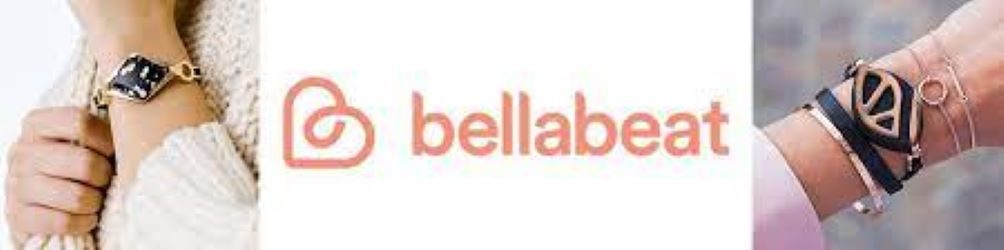

***

## Purpose:

Hello, everyone, I have been doing the Google Data Analytics Professional Certificate through Coursera for the past few months. This is the course's last capstone project for me. In this case study, I will be examining a public dataset for Bellabeat, a wellness technology startup, which was provided by the course. I will be emulating a few of the actual duties of a junior data analyst in this case study.

## Scenario:

At Bellabeat, a high-tech producer of products health-focused for women, you are a member of the marketing analyst team. Even though Bellabeat is a small but successful business, they have the potential to dominate the global market for smart devices. Bellabeat's co-founder and chief creative officer, Urška Sršen, thinks that studying fitness data from smart devices could help the business discover new growth potential. To better understand how consumers use their smart devices, Bellabeat wants you to concentrate on one of its products and evaluate data from connected devices. After then, the company's marketing approach will be guided by the insights you find. In addition to providing high-level recommendations for Bellabeat's marketing strategy, you will submit your study to the leadership management of Bellabeat.


## About the Company:

 Bellabeat is a high-tech business that creates innovative products with a focus on health that was formed by Urška Sršen and Sando Mur.
    
Sršen used her training as an artist to create elegantly crafted technology that educates and empowers women all around the world. With the use of data collection on activity, sleep, stress, and health, Bellabeat has been able to educate women about their own habits and health. Bellabeat has rapidly expanded since its founding in 2013 and established itself as a tech-driven health firm for women. Bellabeat has established offices all around the world by 2016 and had introduced several products. In addition to their own e-commerce channel on their website, an increasing number of online shops started selling Bellabeat products.
    
Sršen is aware that a review of Bellabeat's consumer data would highlight additional growth prospects. To obtain insight into how people are currently using their smart devices, she has requested the marketing analytics team to concentrate on a Bellabeat product and examine smart device usage statistics. Then, based on this knowledge, she would need high-level suggestions on how these trends can influence Bellabeat's marketing plan.


## Data Analysis Process:

To answer the key business questions, throughout the case study I will be following the steps of the data analysis process: **ask, prepare, process, analyze, share, and act**. Moreover, these questions will guide my analysis: 

*  What are some trends in smart device usage? 
*  How could these trends apply to Bellabeat customers? 
*  How could these trends help influence Bellabeat marketing strategy? 



# 1. Ask

Through consumer data of their current usage of smart health apps, insights can be identified and understood which can be applied to current Bellabeat’s comparable products to optimize their marketing strategy for it. Hence, the problem that I am trying to solve with this case study is finding opportunities for growth of Bellabeat by understanding smart devices data (Fitbit fitness tracker data). High-level recommendations can be made to Bellabeat marketing department to then use these insights to drive their business decisions. In essence, the business task is as follows:

**Business Task:** What are typical usage patterns for smart devices such as Fitbit fitness tracker, how these apply to Bellabeat’s devices, how can Bellabeat consumers benefit from them, and how might these patterns affect the company's marketing plan?

# 2. Prepare

The data and dataset used for this case study is taken from [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit?resource=download) on Kaggle and is publicly available for everyone. The dataset is divided into 18 CSV files showing the tracking of personal fitness of 33 Fitbit users in the form of daily and minute by minute activity, intensity, calories, and steps taken. Moreover, sleep and weight log information can also be found. 

This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk (a third-source party) between April 12, 2016, to May 12, 2016. Thirty respondents in the survey gave their consent for the usage of the tracking data, clearing any licensing and privacy issues with it. However, since the data was collected in a survey by a third-party source, its integrity at the time of data collection cannot be ascertained by me. Though, data cleaning and data accuracy checks will be done later in the Process stage to ensure the integrity of data.

ROCCC data is an abbreviation for reliable, original, comprehensive, current, and cited data. In the context of this case study dataset, the data can be termed as having **mediocre reliability** as the sample population was only thirty users, but the sampling bias cannot be determined. The data is also from third-party sources leading to it being **low in originality**. The data ranks **good in comprehensiveness** as it does not seem to be missing any information. Since the data is 7 years old, the data may be outdated as the various parameters of this like average steps taken or sleep activity may have changed over the years. Hence, it is **low in being current**. Lastly, the citation of the data is done by Mobius (the user on Kaggle who provided the dataset) [here](https://zenodo.org/record/53894#.YMoUpnVKiP9).


In order to complete this case study, I would be using R programming language as it would allow me to easily work with all the datasets and provide visualizations quickly. To get started with the preparation, we need to first install packages that are going to be used for our work.

In [1]:
## installing packages that are going to be used
install.packages("tidyverse")
install.packages("dplyr")
install.packages("tidyr")
install.packages("readr")
install.packages("janitor")
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



After installing our packages we would need to set up the environment in which we will be working.

In [2]:
## setting up the environment
library(tidyverse)
library(dplyr)
library(tidyr)
library(readr)
library(janitor)
library(lubridate)
library(skimr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Next, we now need to import those files from the dataset with which we would work. I would be importing 4 data files from the 18 files.

In [5]:
## storing data tables in variables
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

The files that have been imported are as follows:
* **daily_activity:** This file contains daily data about the users in reference of their total steps taken, number of calories burnt,the distance and minutes of sedentary, light, fairly active, and very active activities. 
* **sleep_day:** This file contains daily sleep data of users which inludes time spent on bed and the time sleeping.
* **weight_log:** This file contains weight data of users and tracks their weight whenever the feature has been used on a day to day basis.
* **hourly_intensity:** This file contains data about intensity levels on an hourly period.The total activity intensity level, which indicates the intensity level of physical activity, was calculated by summing the minute-level intensity values that occurred within an hour. Intensity level for the given minute was as follows: 0 – Sedentary, 1- Light, 2 – Moderate, and 3 – Very Active.

To better understand the data files we can use the str() funtion to see the structure of each files which includes the column names, their data type, and few values of those columns.

In [ ]:
## checking the structure of columns 
str(daily_activity)

In [ ]:
str(sleep_day)

In [ ]:
str(weight_log)

In [ ]:
str(hourly_intensity)

**Note:** *From the structures we can see that the ActivityDay/Date are in character data type. We would need to convert it in the date type and format when we are processing and cleaning the data*

# 3. Process

After setting up the environment and importing the data files that I will be using, as data frames for ease, it is imperative to process the data by checking it for any missing or duplicate values and cleaning them if needed.

First, lets identify how many missing values are there in the data

In [ ]:
## identifying how many missing values are there in the data
sum(is.na(daily_activity))
sum(is.na(hourly_intensity))
sum(is.na(sleep_day))
sum(is.na(weight_log))

As can be seen, there are some missing values or N/A in the weight_log data. Hence, we would replace them with the value 0 and form a new data frame.

In [ ]:
## replacing the missing values in weight_log with 0
weight_info <- replace_na(weight_log, list(Fat = 0))

After this, it's time to identify and remove if any duplicate values exist in the data frames. 

In [ ]:
## Identifying duplicates in data
duplicates_sd <- sleep_day[duplicated(sleep_day), ]

In [ ]:
## removing all the duplicates from data
daily_activity <- distinct(daily_activity)
sleep_day <- distinct(sleep_day)
weight_info <- distinct(weight_info)
hourly_intensity <- distinct(hourly_intensity)


In [ ]:
## checking again if all duplicates are removed
sum(duplicated(daily_activity))
sum(duplicated(hourly_intensity))
sum(duplicated(sleep_day))
sum(duplicated(weight_info))

Now I will clean the column names in order to ensure that they only contain lowercase letters and underscores.

In [ ]:
## cleaning all column names in the data
daily_activity <- clean_names(daily_activity)
hourly_intensity <- clean_names(hourly_intensity)
sleep_day <- clean_names(sleep_day)
weight_info <-clean_names(weight_info)

As mentioned above, the date field needs to be converted in the date datatype for the daily_activity,hourly_intensity, and weight_info data frames.For sleep_day, we need to convert it into a datatime data type as we would need the time data later on.

In [ ]:
## renaming and converting Activity Day/Date from character to date data type
daily_activity <- daily_activity %>% rename(date = activity_date) %>% mutate(date = as.Date(date, format = "%m/%d/%Y"))

hourly_intensity <- hourly_intensity %>% rename(date_time = activity_hour) %>% mutate(date_time = mdy_hms(paste(date_time, "AM", sep = " ")))

sleep_day <- sleep_day %>% rename(date = sleep_day) %>% mutate(date = as.Date(date, format = "%m/%d/%Y %H:%M"))

weight_info <- weight_info %>% mutate(date = as.Date(date, format = "%m/%d/%Y %H:%M"))

Hence, now the integrity of the data that we are going to be using is ensured as all the missing values and duplicates have been corrected or removed. Column names have also been cleaned. Furthermore, the columns of date with various names in the date have been standardized to a single date name, and the column’s data type has been changed from character to date. After processing the data, we will start analyzing it.

# 4. Analyze and Share

To start analyzing the data, the first step should be to understand how many distinct users, out of the 33, are there in our 4 data files. 

In [3]:
## Checking how many distinct users are there for each data 
n_distinct(daily_activity$id)
n_distinct(hourly_intensity$id)
n_distinct(sleep_day$id)
n_distinct(weight_info$id)

ERROR: Error in list2(...): object 'daily_activity' not found


It looks like all 33 users are there for the daily_activity and hourly_intensity data frames. However, there are 24 user ids in sleep_day and only 8 users in the weight_info. Since, having data from only 8 users would not let us make any substantial inference, I would **not be using the weight_info for our analysis** even though it may have useful information.

Now, we can check some summary statistics for our data to understand some key insights from it. Below I will find out the summary for each data frame and try to understand it.

In [ ]:
## Checking summary statistics for our data
daily_activity %>% 
  select(total_steps, total_distance, calories ,very_active_minutes,
         fairly_active_minutes, lightly_active_minutes, sedentary_minutes) %>% 
  summary()

* We found, among the 33 users, that the average number of steps they take daily is 7638 steps. 
* The average calories burnt by users was 96 calories burnt per hour and 1.6 per minute.
* The Fitbit tracker managed to record and track only 20.31 hours of data such as for the minutes spent on the various categories of activity levels. On average, from this about 991.2 minutes or 16.52 hrs were sedentary minutes or the minutes in which no activity was done by the user. About 192.8 minutes or 3.21 hrs of users were involved in light activities. 13.56 minutes were on average spent on fairly active activities and 21.16 minutes only on very highly active activities.  

In [ ]:
sleep_day %>% 
  select(total_time_in_bed, total_minutes_asleep) %>% 
  summary()

* An average of 7 hours 38 mins is spent on bed by the users, and from that 7 hrs. is spent sleeping.  

In [ ]:
hourly_intensity %>% 
  select(total_intensity) %>% 
  summary()

* The total intensity level on average was approximately 12 in an hour and reached as high as 180 for a user.

Understanding some summary statistics allowed us to form a better guage of the data, but these findings are not enough to form recommendations for Bellabeat. Therefore, it would be better to use some visualizations to better show our analysis. 

### Percentage of minutes for each activity

First, lets understand the percentages of how many average minutes are the very active, fairly active, lightly active, and sedentary activities being done to get an understanding of how active are our users. We can start by first calculating totals for each of the different type of activity, and then finding percentages for each. After converting it into long data for ease, I would make a pie chart to show us the distribution of minutes for each activity.

In [ ]:
## calculating the total for each activity
total_mins <- daily_activity %>%
  summarise(
    sum_vam = round(sum(very_active_minutes), 2),
    sum_fam = round(sum(fairly_active_minutes), 2),
    sum_lam = round(sum(lightly_active_minutes), 2),
    sum_sm = round(sum(sedentary_minutes), 2),
    total_sum = sum_vam + sum_fam + sum_lam + sum_sm)

## finding the % for each activity and converting it to long data
total_mins_percentage <- total_mins %>% 
  mutate(
    Very_Active_minutes = (sum_vam / total_sum) * 100,
    Fairly_Active_minutes = (sum_fam / total_sum) * 100, 
    Lightly_Active_minutes = (sum_lam / total_sum) * 100,
    Sedentary_minutes = (sum_sm / total_sum) * 100) %>%
  select(
    Very_Active_minutes,
    Fairly_Active_minutes,
    Lightly_Active_minutes,
    Sedentary_minutes) %>% 
  round(digits = 2) %>% 
  pivot_longer(
    cols = c(Very_Active_minutes, Fairly_Active_minutes, Lightly_Active_minutes, Sedentary_minutes),
    names_to = "activity",
    values_to = "percentage")

## making a pie chart from the data
pie(
  total_mins_percentage$percentage,
  labels = paste(total_mins_percentage$activity, total_mins_percentage$percentage, "%"),
  col = c("red", "yellow", "limegreen", "skyblue"),
  main = "Percentage of minutes for each activity"
)
par(mar = c(5, 4, 4, 2) + 0.1)

* Sedentary minutes are defined as the amount of time spent doing very low-intensity or motion-light activities. Sitting, lying down, or performing other low-energy activities tend to be among these activities. From the Percentage of Minutes for each activity pie chart, **81.33%** of the time daily is spent just on sedentary minutes and activities.

* Activities that demand some movement but don’t significantly raise heart rate or energy expenditure are considered Light activity minutes. Slow walking, casual biking, mild stretching, and household tasks are a few examples of light activities. The second highest percentage, although a stark difference compared to sedentary, is associated with it with **15.82%.**

* A moderate amount of physical activity is represented by Fairly active minutes. A few examples of moderately energetic pursuits are gardening, leisurely cycling, and brisk walking. The lowest percentage of only **1.11%** is of fairly active minutes.

* Very active minutes are defined as those spent performing vigorous physical activities with a markedly elevated heart rate, respiration rate, and energy expenditure. These activities, which can include running, jogging, intense cycling, swimming, and taking part in high-intensity interval training, are often associated with rigorous exercise. **1.74%** of the total percentage is spent in minutes by users on very active activities.

### Average Total Intensity Per Day

Now we can try to find out at which day the users or people generally are most active. Hence, we can calculate the total intensity per day being used by the users in the form of a bar chart.

In [ ]:
## making a new column in hourly_intensity showing the day of the week
hourly_intensity$hourly_intensity_day <- wday(hourly_intensity$date_time, label=TRUE)

## finding the average total intensity for each day of the week
daily_intensity_day <- hourly_intensity %>% 
  group_by(hourly_intensity_day) %>% 
  summarize(average_total_intensity = mean(total_intensity))

## making a bar chart to show the daily intensity done by users
ggplot(data = daily_intensity_day) + 
  geom_col(mapping = aes(x = hourly_intensity_day, y = average_total_intensity, fill = "peachpuff")) +
  labs(title = "Average Total Intensity per Day", x = "Week Day", y = "Intensity Level") +
  theme(plot.title = element_text(hjust = 0.5)) +
  guides(fill = "none")

* From this bar chart it can be seen that users are most active on Saturday. On Saturday, people usually have more time to do some exercising and do some lightly active activities. On the contrary, people are the least active on Sundays as their intensity level is lowest on this day. This could be due to people opting for relaxation in their homes after doing some activities on Saturday.

### Average total intensity per Hour 

In order to get even more details about this we can calculate on an hourly basis too for the whole day in a bar chart.

In [ ]:
## making a new column in hourly_intensity showing the hour of the week
hourly_intensity$hourly_intensity_hour <- hour(hourly_intensity$date_time)

## finding the average total intensity for each hour of the week
daily_intensity_hour <- hourly_intensity %>% 
  group_by(hourly_intensity_hour) %>% 
  summarize(average_total_intensity = mean(total_intensity))

## making a bar chart to show the hourly intensity done by users
ggplot(data = daily_intensity_hour) + 
  geom_col(mapping = aes(x = hourly_intensity_hour, y = average_total_intensity), fill = "#FFD700") +
  labs(title = "Average Total Intensity per Hour", x = "Hour", y = "Intensity level") +
  theme_classic() + 
  theme(plot.title = element_text(hjust = 0.5)) +
  guides(fill = "none") +
  scale_x_continuous(breaks = seq(0, 23, by = 1))

* After understanding the average total intensity of users per hour, it can be inferred that people are most active from 5 pm to 7 pm (17.00 pm to 19.00 pm). This is a time most associated with after-work hours in many countries as mostly people become free from work till 5pm. 12 pm to 2 pm which is around lunch or after-lunch time is the second most activity intensive hours among people. It could be due to people having half an hour or an hour of free time during this time at work or in their homes to do some exercise or lightly active activities.

### Relation between Steps taken and Calories Burnt

Linear regression lines can also be made between two variables to understand how their relation works. For example, how steps taken and calories burnt correlates can be found by making a graph.

In [ ]:
## now checking the relation between steps taken and calories burnt
daily_activity %>% 
  ggplot() + 
  geom_jitter(mapping = aes(x = total_steps, y = calories, color = "peachpuff")) +
  stat_smooth(mapping = aes(x = total_steps, y = calories), method = "lm") +
  labs(title = "Relation between Steps taken and Calories burnt", x = "Steps", y = "Calories Burnt") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme_classic() +
  guides(color = "none")

* There is a positive linear relationship between steps taken and calories burnt which means as the number of steps taken on average increases the number of calories being burned would also increase. To find how strong their relation is, the correlation needs to be found out as below. 

In [ ]:
## finding how strong the correlation is
daily_activity %>%
  summarise(correlation = cor(total_steps, calories, method = "pearson"))

* Hence, there is a moderate to strong correlation between steps taken by users and the calories burnt.

### Relation between Total time in bed vs Totl time asleep

Another graph can also be made which confirms whether the amount of time peole are spending in bed highly correlates to more time sleeping or not. 
* As the plot points are very close together, we can see and infer that there is a very strong positive relationship between time spent in bed and time spent asleep. 

In [ ]:
## now checking the relation between total time in bed vs total mins asleep
sleep_day %>% 
  ggplot() + 
  geom_jitter(mapping = aes(x = total_time_in_bed, y = total_minutes_asleep, color = "peachpuff")) +
  stat_smooth(mapping = aes(x = total_time_in_bed, y = total_minutes_asleep), method = "lm") +
  labs(title = "Total time in bed vs Total time asleep ", x = "Mins in Bed", y = "Mins asleep") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme_classic() +
  guides(color = "none")

### Percentage of Sleep for each Category

The last analysis that we can do is finding out whether the amount of sleep people are getting is enough or not. According to [this article](https://academic.oup.com/sleep/article/38/6/843/2416939) sleeping less than 7 hours a night can be termed as low sleep which can be adverse for health over a period of time. On the other hand, 9 hours of sleep or more than that can be termed as either optimal or high (often sleep much higher than 9 hours can be problematic too). Hence, moderate sleep would be sleeping between 7 to 9 hours. 

Therefore, in order to find more useful information from this data we can try to see whether the amount of sleep they are getting is low, moderate, or high by making a pie chart again.

In [ ]:
## finding the average hours of sleep of each user and classifying it
hours_of_sleep <- sleep_day %>% 
  group_by(id) %>% 
  mutate(total_hr_asleep = total_minutes_asleep / 60) %>% 
  summarise(average_hr_asleep = round(mean(total_hr_asleep), 2)) %>%
  mutate(amount_of_sleep = ifelse(average_hr_asleep < 7, "Low sleep",
                                  ifelse(average_hr_asleep >= 7 & average_hr_asleep <= 9, "Moderate sleep",
                                         ifelse(average_hr_asleep > 9, "High sleep", NA)))
  )

## calculating number of users for each classification and percentages for it
amount_percents <- hours_of_sleep %>% 
  group_by(amount_of_sleep) %>% 
  summarise(number_of_users = n()) %>% 
  mutate(percent =  round((number_of_users/24 * 100), 2))


amount_percents %>% 
  ggplot(aes(x = "", y = percent, fill = amount_of_sleep)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Percentage of Users for each Sleep Category",
       fill = "Amount of Sleep",
       x = NULL, y = NULL) +
  theme_void() +
  theme(plot.title = element_text(hjust = 0.5) , legend.position = "right") + 
  geom_text(aes(label = paste0(round(percent, 2), "%")),
            position = position_stack(vjust = 0.5))


* As seen in the pie chart, more than half, about **54.17%** of the user’s sleep can be termed as low sleep which means they are sleeping less than 7 hours in a night which is not healthy. Next, about **41.67%** of the sleep is in moderate category. Lastly, only **4.17%** of the users are achieving high sleep.

## Summary of Findings:

Here is a summary of all the findings we did in the case study:

* We found, among the 33 users, that the average number of steps they take daily is 7638 steps. 

* The average calories burnt by users was 96 calories burnt per hour and 1.6 per minute.

* The Fitbit tracker managed to record and track only 20.31 hours of data such as for the minutes spent on the various categories of activity levels. On average, from this about 991.2 minutes or 16.52 hrs were sedentary minutes or the minutes in which no activity was done by the user. About 192.8 minutes or 3.21 hrs of users were involved in light activities. 13.56 minutes were on average spent on fairly active activities and 21.16 minutes only on very highly active activities.  

* An average of 7 hours 38 mins is spent on bed by the users, and from that 7 hrs. is spent sleeping.  

* The total intensity level on average was approximately 12 in an hour and reached as high as 180 for a user.

* Sedentary minutes are defined as the amount of time spent doing very low-intensity or motion-light activities. Sitting, lying down, or performing other low-energy activities tend to be among these activities. From the Percentage of Minutes for each activity pie chart, 81.33% of the time daily is spent just on sedentary minutes and activities.

* Activities that demand some movement but don’t significantly raise heart rate or energy expenditure are considered Light activity minutes. Slow walking, casual biking, mild stretching, and household tasks are a few examples of light activities. The second highest percentage, although a stark difference compared to sedentary, is associated with it with 15.82%.

* A moderate amount of physical activity is represented by Fairly active minutes. A few examples of moderately energetic pursuits are gardening, leisurely cycling, and brisk walking. The lowest percentage of only 1.11% is of fairly active minutes.

* Very active minutes are defined as those spent performing vigorous physical activities with a markedly elevated heart rate, respiration rate, and energy expenditure. These activities, which can include running, jogging, intense cycling, swimming, and taking part in high-intensity interval training, are often associated with rigorous exercise. 1.74% of the total percentage is spent in minutes by users.

* Users are most active on Saturday. On Saturday, people usually have more time to do some exercising and do some lightly active activities. On the contrary, people are the least active on Sundays as their intensity level is lowest on this day. This could be due to people opting for relaxation in their homes after doing some activities on Saturday.

* People are most active from 5 pm to 7 pm (17.00 pm to 19.00 pm). This is a time most associated with after-work hours in many countries as mostly people become free from work till 5pm. 12 pm to 2 pm which is around lunch or after-lunch time is the second most activity intensive hours among people. It could be due to people having half an hour or an hour of free time during this time at work or in their homes to do some exercise or lightly active activities.

* There is a positive linear moderate relationship between steps taken and calories burnt which means as the number of steps taken on average increases the number of calories being burned would also increase. To find how strong their relation is, the correlation needs to be found out as below. 

* There is a very strong positive relationship between time spent in bed and time spent asleep. 

* More than half, about 54.17% of the user’s sleep can be termed as low sleep which means they are sleeping less than 7 hours in a night which is not healthy. Next, about 41.67% of the sleep is in moderate category. Lastly, only 4.17% of the users are achieving high sleep.



# 5. Act

In the last part of this case study, recommendations can be made to Bellabeat's marketing team on how they could use these trends and insights for their products. Since Bellabeat's products, like Ivy and Leaf, function as a fitness tracker primarily they can use these findings from FitBit's fitness tracker data for their own products and customers easily. Hence, the recommendations are:

* As we saw, on average, the users are taking 7638 steps daily. A good target, according to many health websites is achieving 10,000 steps daily. Bellabeat should try to encourage its customers/consumers through its fitness products to take more steps by notifying them on timely intervals their current step count and how many steps remain of their daily goals. 

* Since most of the users were not active and had a higher percentage of sedentary minutes, Bellabeat can focus on promoting active lifestyles. They can design campaigns that encourage users to break up sedentary periods with light activities like stretching, short walks, or standing breaks.

* With a significant portion of users not achieving the recommended 7-9 hours of sleep, Bellabeat can emphasize the importance of sufficient sleep for overall well-being. They could create content around relaxation techniques, and the benefits of better sleep. Moreover, Bellabeat could develop personalized sleep plans in their fitness products or product apps based on users' sleep data and patterns. These plans could offer tailored recommendations or provide analysis of their current sleeping habits to help users improve the quality and duration of their sleep.

* Since users are most active during 5 pm to 7 pm and around lunchtime, Bellabeat can provide targeted suggestions for workouts or activities during these hours. Promotions for fitness classes, home workouts, or outdoor activities could be aligned with these peak activity times. Furthermore, with users being the least active on Sunday, they can also prompt users to maintain their excersises or activities on Sunday to ensure that their average intensity level over the whole week stays up.

* Lastly, to ensure a much higher activity level of its users, Bellabeat can celebrate user achievements in terms of meeting activity and sleep goals. Recognizing and rewarding users for reaching their targets can boost motivation and engagement.
